In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from transient import *

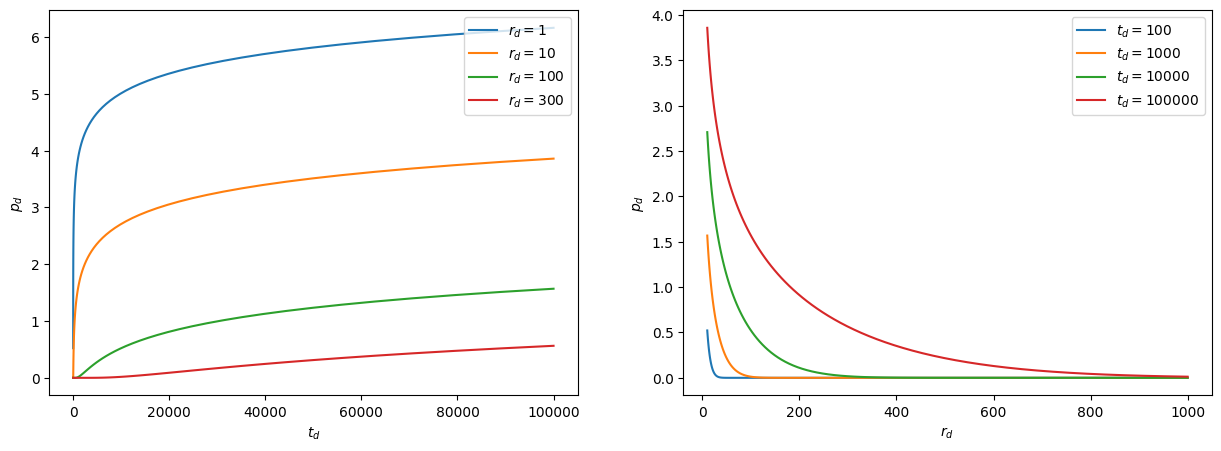

In [3]:
"""
построим графики решений от расстояния и времени для аналитического 
решения
"""
# зададим диапазоны изменения параметров для построения графиков
td_arr = np.logspace(0,5,100)
td_list = [100, 1000, 10000, 100000]
rd_arr = np.logspace(1,3,100)
rd_list = [1., 10., 100., 300.]

# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in rd_list:
    ax1.plot(td_arr, 
             pd_line_source_ei(td=td_arr, 
                               rd=ri), 
             label = f'$r_d={ri:.0f}$')
for ti in td_list:
    ax2.plot(rd_arr, 
             np.squeeze([pd_line_source_ei(td=ti, 
                                           rd=ri) for ri in rd_arr]), 
             label = f'$t_d={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

In [4]:
pd_func = lambda td, rd: pd_lapl_inv(td, rd, Lpd_func = Lpd_circle_boundary)

In [5]:
pd_func1 = lambda td, rd: pd_lapl_inv(td, rd, Lpd_func = Lpd_circle_boundary_const_press)

c:\projects\welltest_examples\welltest_design\transient.py:158: RuntimeWarning: invalid value encountered in divide
  Lpd =  (i0rde * k0rd - k0rde * i0rd) / (i0rde * zK1 + k0rde * zI1)
c:\projects\welltest_examples\welltest_design\transient.py:158: RuntimeWarning: invalid value encountered in multiply
  Lpd =  (i0rde * k0rd - k0rde * i0rd) / (i0rde * zK1 + k0rde * zI1)


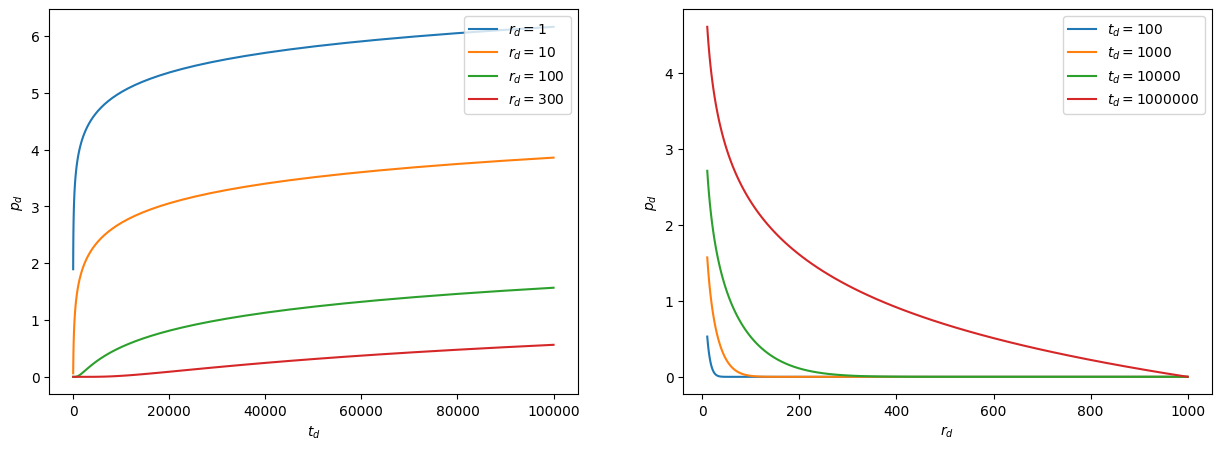

In [9]:
"""
построим графики решений от расстояния и времени для аналитического 
решения
"""
# зададим диапазоны изменения параметров для построения графиков
td_arr = np.logspace(0.1,5,100)
td_list = [100, 1000, 10000, 1000000]
rd_arr = np.logspace(1,3,100)
rd_list = [1., 10., 100., 300.]

# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in rd_list:
    ax1.plot(td_arr, 
             pd_func(td_arr, 
                               rd=ri), 
             label = f'$r_d={ri:.0f}$')
for ti in td_list:
    ax2.plot(rd_arr, 
             np.squeeze([pd_func(ti, 
                                           rd=ri) for ri in rd_arr]), 
             label = f'$t_d={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

c:\projects\welltest_examples\welltest_design\transient.py:176: RuntimeWarning: invalid value encountered in divide
  return ((-sp.i0(rd_u05) * sp.k0(rd_external_u05) + sp.i0(rd_external_u05) * sp.k0(rd_u05)) /
c:\projects\welltest_examples\welltest_design\transient.py:176: RuntimeWarning: invalid value encountered in multiply
  return ((-sp.i0(rd_u05) * sp.k0(rd_external_u05) + sp.i0(rd_external_u05) * sp.k0(rd_u05)) /


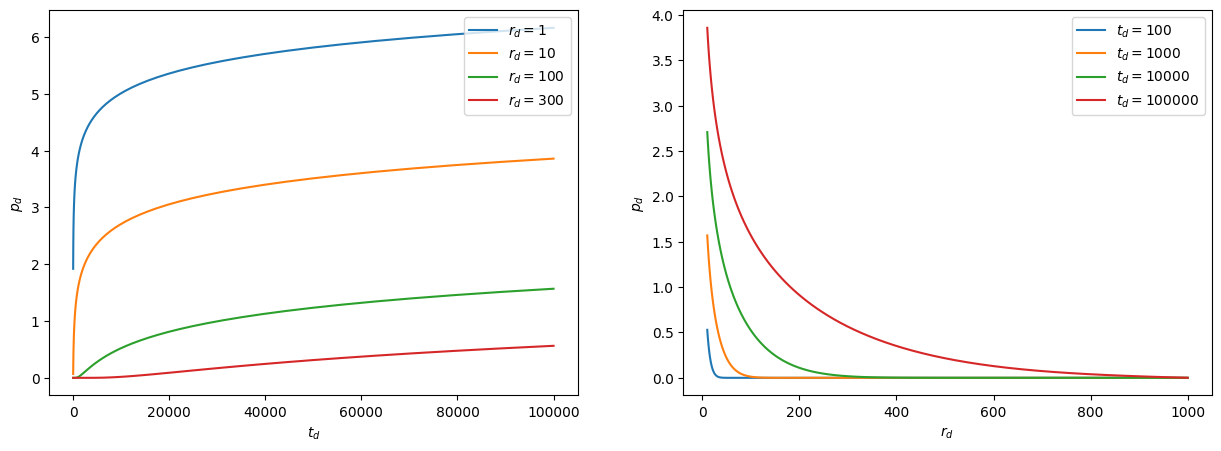

In [144]:
"""
построим графики решений от расстояния и времени для аналитического 
решения
"""
# зададим диапазоны изменения параметров для построения графиков
td_arr = np.logspace(0,5,100)
td_list = [100, 1000, 10000, 100000]
rd_arr = np.logspace(1,3,100)
rd_list = [1., 10., 100., 300.]

# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in rd_list:
    ax1.plot(td_arr, 
             pd_func1(td_arr, 
                               rd=ri), 
             label = f'$r_d={ri:.0f}$')
for ti in td_list:
    ax2.plot(rd_arr, 
             np.squeeze([pd_func1(ti, 
                                           rd=ri) for ri in rd_arr]), 
             label = f'$t_d={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

In [93]:
pd_line_source_laplace

<function anaflow.tools.laplace.get_lap_inv.<locals>.ret_func(time)>

In [45]:
pd_line_source_ei(np.array([0.,2.]), 1.)

array([0.        , 0.81171282])

In [49]:
pd_line_source_ei(1, 1.)

array(0.52214132)

In [64]:
td = np.linspace(0, 0.52, 1000)
pd = pd_superposition(td)

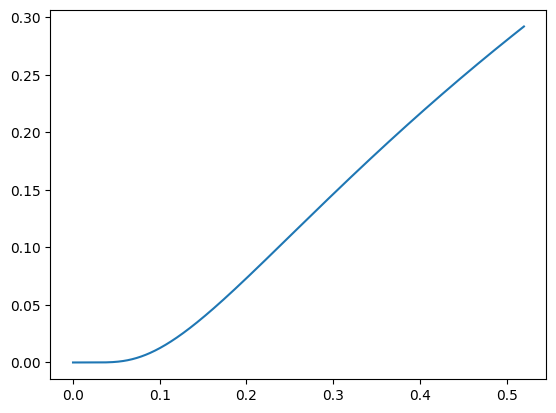

In [65]:
plt.plot(td, pd)

In [69]:
??pd_lapl_inv

Signature:
pd_lapl_inv(
    td: Union[float, numpy.ndarray],
    rd: Union[float, numpy.ndarray] = 1.0,
    Lpd_func: Callable = <function _Lpd_line_source at 0x000001B211E92D40>,
) -> numpy.ndarray
Source:   
def pd_lapl_inv(td:FloatArray, 
                rd:FloatArray=1.,
                Lpd_func:Callable=_Lpd_line_source)->np.ndarray:
    """
    расчет решения линейного стока для безразмерного давления
    на основе численного обратного преобразования Лапласа 
    (алгоритм Стефеста)
    t_d - безразмерное давление, число или numpy массив
    r_d - безразмерный радиус, по умолчанию rd=1 - соответствует
         давлению на забое, должно быть числом
    результат массив массивов давления от времени
    """
    pd_inv = get_lap_inv(Lpd_func, rd=rd)
    return pd_inv(td)
File:      c:\projects\welltest_examples\welltest_design\transient.py
Type:      function

In [97]:
import scipy.special as sp

In [98]:
sp.k0(1)

np.float64(0.42102443824070823)

In [99]:
sp.kn(0,1)

np.float64(0.42102443824070834)

In [102]:
%timeit sp.k1(1)
%timeit sp.kn(1,1)
%timeit sp.kv(1,1)

632 ns ± 0.636 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
834 ns ± 1.62 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
885 ns ± 0.743 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [103]:
aa = np.array([1,2,3,4,5])

In [105]:
aa < 3

array([ True,  True, False, False, False])

In [106]:
aa[aa<3] = 0

In [107]:
aa

array([0, 0, 3, 4, 5])